In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
sns.set()
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('eurotodollar.csv')

In [24]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
pd.set_option('use_inf_as_na',True)

In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.0
mean,0.870301,0.872884,0.867848,0.870280,0.870280,0.0
std,0.035697,0.036067,0.035460,0.035706,0.035706,0.0
min,0.799190,0.803180,0.796300,0.799360,0.799360,0.0
25%,0.844415,0.847025,0.842345,0.844400,0.844400,0.0
50%,0.867230,0.869060,0.864300,0.867050,0.867050,0.0
75%,0.894175,0.897055,0.891821,0.894075,0.894075,0.0
max,0.997440,1.004660,0.995100,0.997440,0.997440,0.0


In [28]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-20,0.86739,0.87107,0.85837,0.86742,0.86742,0.0
1,2017-07-21,0.85999,0.86057,0.85652,0.85994,0.85994,0.0
2,2017-07-24,0.85605,0.85972,0.85604,0.85604,0.85604,0.0
3,2017-07-25,0.85919,0.85973,0.85420,0.85919,0.85919,0.0
4,2017-07-26,0.85886,0.86090,0.85800,0.85877,0.85877,0.0
...,...,...,...,...,...,...,...
1300,2022-07-14,0.99674,1.00466,0.99510,0.99674,0.99674,0.0
1301,2022-07-15,0.99744,0.99894,0.99030,0.99744,0.99744,0.0
1302,2022-07-18,0.99046,0.99183,0.98050,0.99046,0.99046,0.0
1303,2022-07-19,0.98569,0.98759,0.97388,0.98569,0.98569,0.0


In [34]:
pd.set_option('mode.use_inf_as_na', True)
df.dropna(inplace=True)

In [35]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-20,0.86739,0.87107,0.85837,0.86742,0.86742,0.0
1,2017-07-21,0.85999,0.86057,0.85652,0.85994,0.85994,0.0
2,2017-07-24,0.85605,0.85972,0.85604,0.85604,0.85604,0.0
3,2017-07-25,0.85919,0.85973,0.85420,0.85919,0.85919,0.0
4,2017-07-26,0.85886,0.86090,0.85800,0.85877,0.85877,0.0
...,...,...,...,...,...,...,...
1300,2022-07-14,0.99674,1.00466,0.99510,0.99674,0.99674,0.0
1301,2022-07-15,0.99744,0.99894,0.99030,0.99744,0.99744,0.0
1302,2022-07-18,0.99046,0.99183,0.98050,0.99046,0.99046,0.0
1303,2022-07-19,0.98569,0.98759,0.97388,0.98569,0.98569,0.0


In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.0
mean,0.870301,0.872884,0.867848,0.870280,0.870280,0.0
std,0.035697,0.036067,0.035460,0.035706,0.035706,0.0
min,0.799190,0.803180,0.796300,0.799360,0.799360,0.0
25%,0.844415,0.847025,0.842345,0.844400,0.844400,0.0
50%,0.867230,0.869060,0.864300,0.867050,0.867050,0.0
75%,0.894175,0.897055,0.891821,0.894075,0.894075,0.0
max,0.997440,1.004660,0.995100,0.997440,0.997440,0.0


In [5]:
#Target value is of course the Currency rate at the closing 

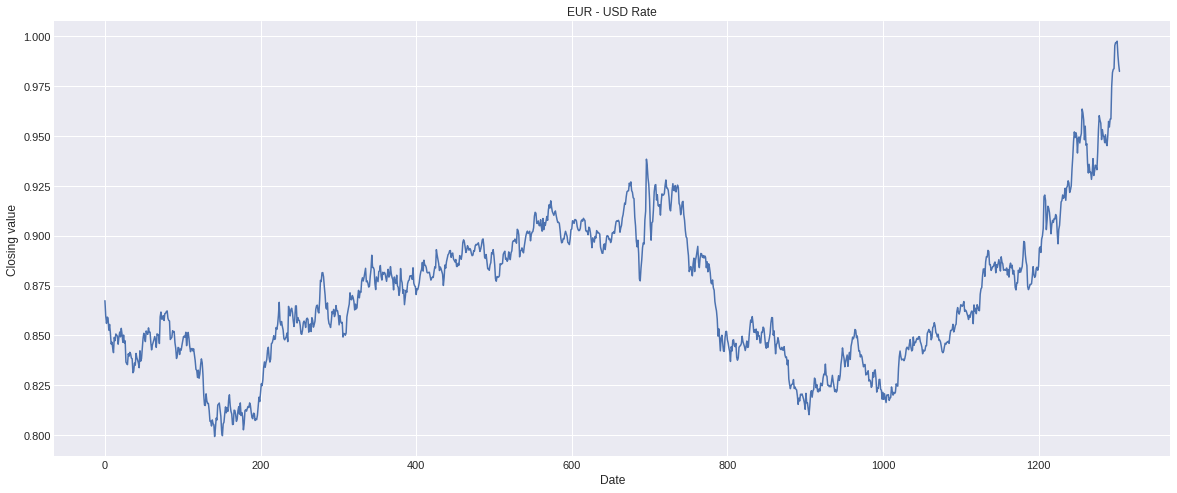

In [37]:
plt.figure(figsize = (20,8))
plt.title("EUR - USD Rate")
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.plot(df['Close'])
plt.show()

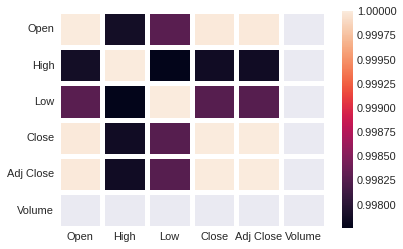

In [38]:
sns.heatmap(df.corr(),linewidths=5)
plt.show()

In [39]:
x = df[['Open','High','Low']]
y = df['Close']

In [40]:
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [60]:
model = LinearRegression()
model2 = DecisionTreeRegressor()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
predicted = model.predict(x_test)
predicted2 = model2.predict(x_test)

In [70]:
data = pd.DataFrame(data={"Predicted Rate with Linear Regression": predicted.flatten()})
data2 = pd.DataFrame(data={"Predicted Rate with Decision Tree Regressor": predicted2.flatten()})

In [71]:
print(data.head()) ,print(data2.head())

   Predicted Rate with Linear Regression
0                               0.856935
1                               0.848768
2                               0.818148
3                               0.894968
4                               0.820039
   Predicted Rate with Decision Tree Regressor
0                                     0.857000
1                                     0.848600
2                                     0.818063
3                                     0.894970
4                                     0.819700


(None, None)